# Sales Data Analysis

## 1. Data Collection

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and read the data file

In [2]:
df = pd.read_excel(r'C:\Users\admin\Documents\Data for exercises\1000Sales Records.xlsx')
df.head()

Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority Order Date   Order ID  Ship Date  Units Sold  Unit Price  \
0              M 2014-10-18  686800706 2014-10-31        8446      437.20   
1              M 2011-11-07  185941302 2011-12-08        3018      154.06   
2              C 2016-10-31  246222341 2016-12-09        1517      255.28   
3              C 2010-04-10  161442649 2010-05-12        3322      205.70   
4              H 2011-08-16  645713555 2011-08-31        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.20  2224085.18    1468506.02  
1      90.93      464953.08   274426.74     190526.34  
2     159.42      387259.76   241840.14     145419.62  
3     117.11      683335.40   389039.42     294295.98  
4       6.92       91853.85    68127.40      23726.45

## 2. Data Cleaning 

In [3]:
# remove unuseful column/data from dataset
df =df.drop('Order ID',axis=1)

#### Sanity check for data

In [4]:
# shape of data
df.shape

(1000, 13)

In [5]:
# get data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          1000 non-null   object        
 1   Country         1000 non-null   object        
 2   Item Type       1000 non-null   object        
 3   Sales Channel   1000 non-null   object        
 4   Order Priority  1000 non-null   object        
 5   Order Date      1000 non-null   datetime64[ns]
 6   Ship Date       1000 non-null   datetime64[ns]
 7   Units Sold      1000 non-null   int64         
 8   Unit Price      1000 non-null   float64       
 9   Unit Cost       1000 non-null   float64       
 10  Total Revenue   1000 non-null   float64       
 11  Total Cost      1000 non-null   float64       
 12  Total Profit    1000 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 101.7+ KB


In [6]:
# check missing values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
# finding duplicates
df.duplicated().sum()

0

In [8]:
# check garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())

Europe                               267
Sub-Saharan Africa                   262
Middle East and North Africa         138
Asia                                 136
Central America and the Caribbean     99
Australia and Oceania                 79
North America                         19
Name: Region, dtype: int64
Cuba              11
Czech Republic    10
Bahrain           10
Zimbabwe          10
Malaysia          10
                  ..
Denmark            2
The Gambia         2
Kosovo             1
Malta              1
Cameroon           1
Name: Country, Length: 185, dtype: int64
Beverages          101
Vegetables          97
Office Supplies     89
Baby Food           87
Personal Care       87
Snacks              82
Cereal              79
Clothes             78
Meat                78
Household           77
Cosmetics           75
Fruits              70
Name: Item Type, dtype: int64
Offline    520
Online     480
Name: Sales Channel, dtype: int64
L    268
C    262
M    242
H    228
Name: Or

## 3. Exploratory Data Analysis (EDA)

In [9]:
# get statistical summary of specific numerical column
df[["Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]].describe()

Units Sold  Unit Price    Unit Cost  Total Revenue    Total Cost  \
count  1000.000000  1000.00000  1000.000000   1.000000e+03  1.000000e+03   
mean   5053.988000   262.10684   184.965110   1.327322e+06  9.361192e+05   
std    2901.375317   216.02106   175.289311   1.486515e+06  1.162571e+06   
min      13.000000     9.33000     6.920000   2.043250e+03  1.416750e+03   
25%    2420.250000    81.73000    56.670000   2.811919e+05  1.649319e+05   
50%    5184.000000   154.06000    97.440000   7.549392e+05  4.647261e+05   
75%    7536.750000   421.89000   263.330000   1.733503e+06  1.141750e+06   
max    9998.000000   668.27000   524.960000   6.617210e+06  5.204978e+06   

       Total Profit  
count  1.000000e+03  
mean   3.912026e+05  
std    3.836402e+05  
min    5.326100e+02  
25%    9.837612e+04  
50%    2.772260e+05  
75%    5.484568e+05  
max    1.726181e+06

In [10]:
# get statistical summary of object column
df.describe(include="object")

Region Country  Item Type Sales Channel Order Priority
count     1000    1000       1000          1000           1000
unique       7     185         12             2              4
top     Europe    Cuba  Beverages       Offline              L
freq       267      11        101           520            268

array([[<Axes: title={'center': 'Units Sold'}>,
        <Axes: title={'center': 'Unit Price'}>,
        <Axes: title={'center': 'Unit Cost'}>],
       [<Axes: title={'center': 'Total Cost'}>,
        <Axes: title={'center': 'Total Revenue'}>,
        <Axes: title={'center': 'Total Profit'}>]], dtype=object)

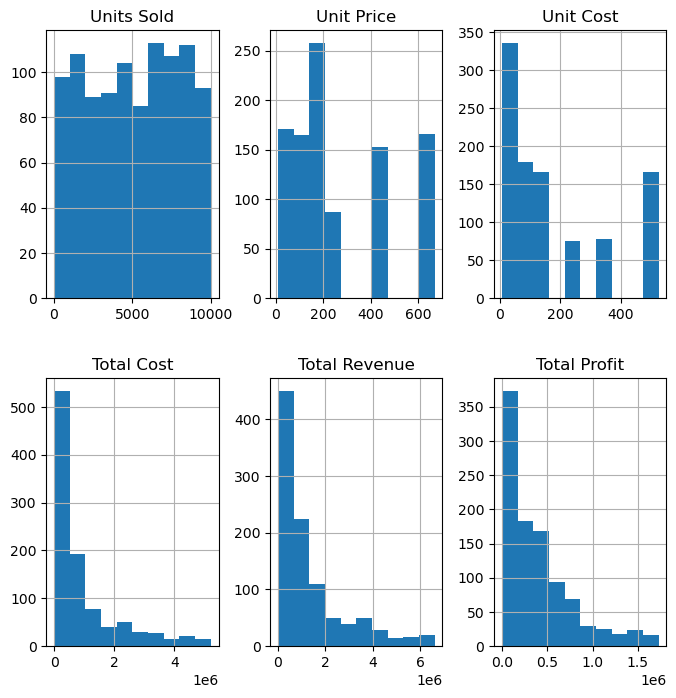

In [11]:
# plot histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
    
fig, axis = plt.subplots(2,3,figsize=(8, 8))
df[["Units Sold","Unit Price","Unit Cost","Total Cost","Total Revenue","Total Profit"]].hist(ax=axis)

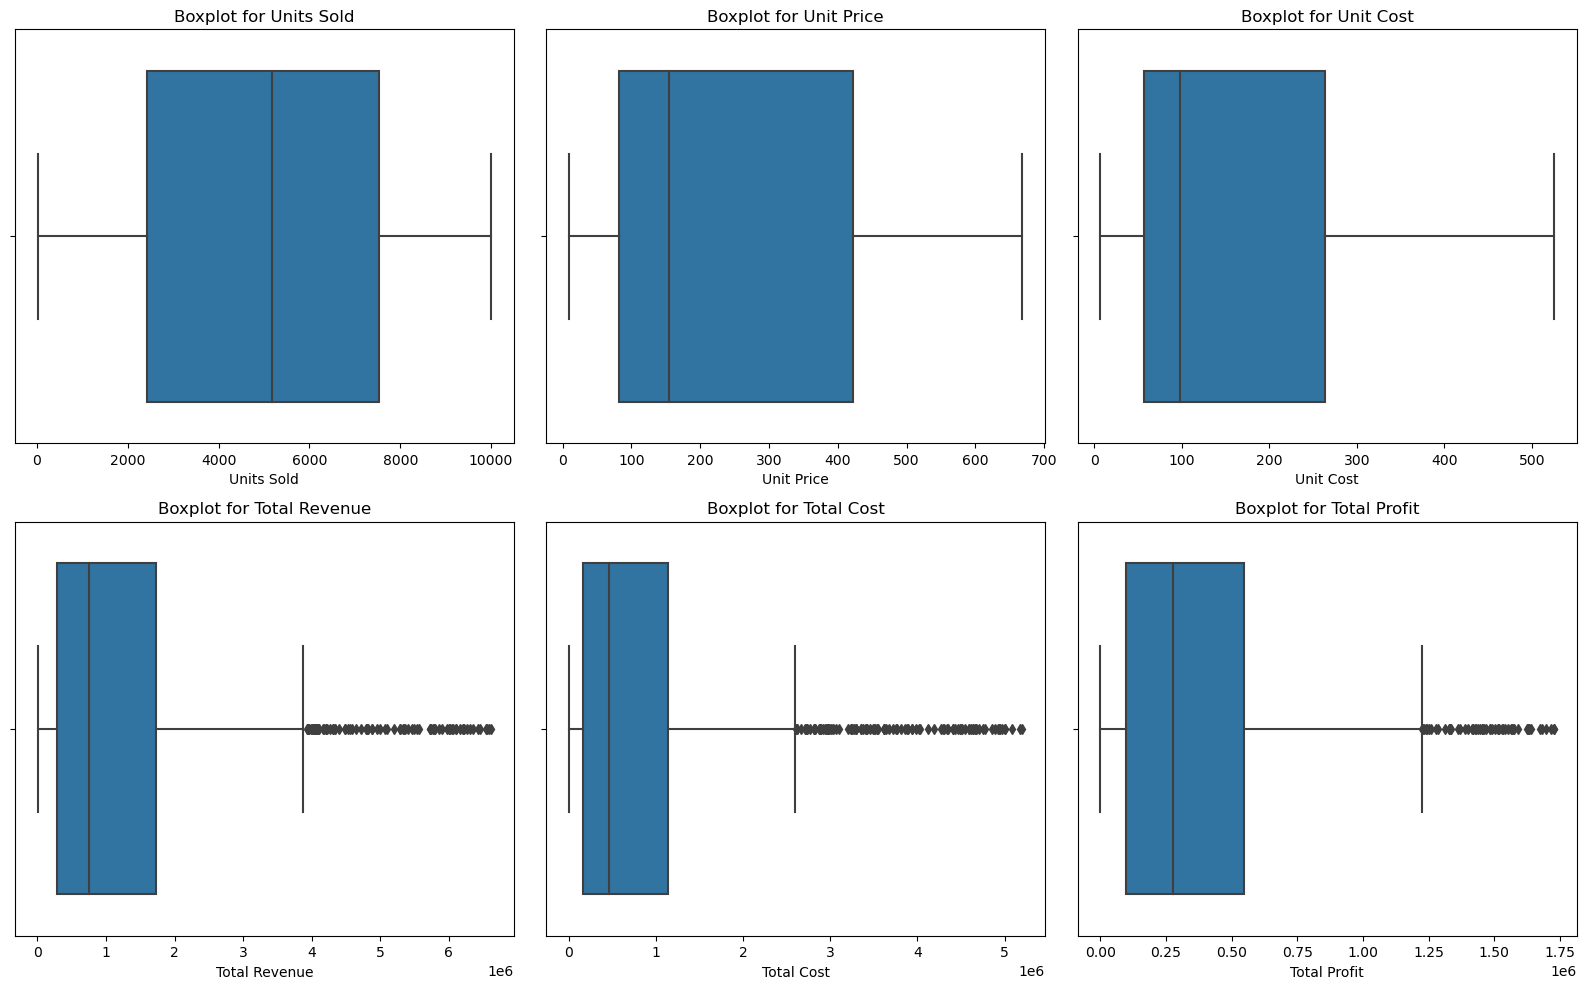

In [12]:
# visualize outliers using boxplot
import warnings
warnings.filterwarnings("ignore")
  
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Create a 2x3 grid of subplots
columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axes[i])  # Use individual axes
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Using this boxplot, we can see there are outliers in 'Total Revenue','Total Cost','Total Profit' columns of data. There is no meaning to remove these outliers, it's because of there is no measurement error, values are in range.

In [13]:
# get the column name
df.select_dtypes(include="number").columns

Index(['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit'],
      dtype='object')

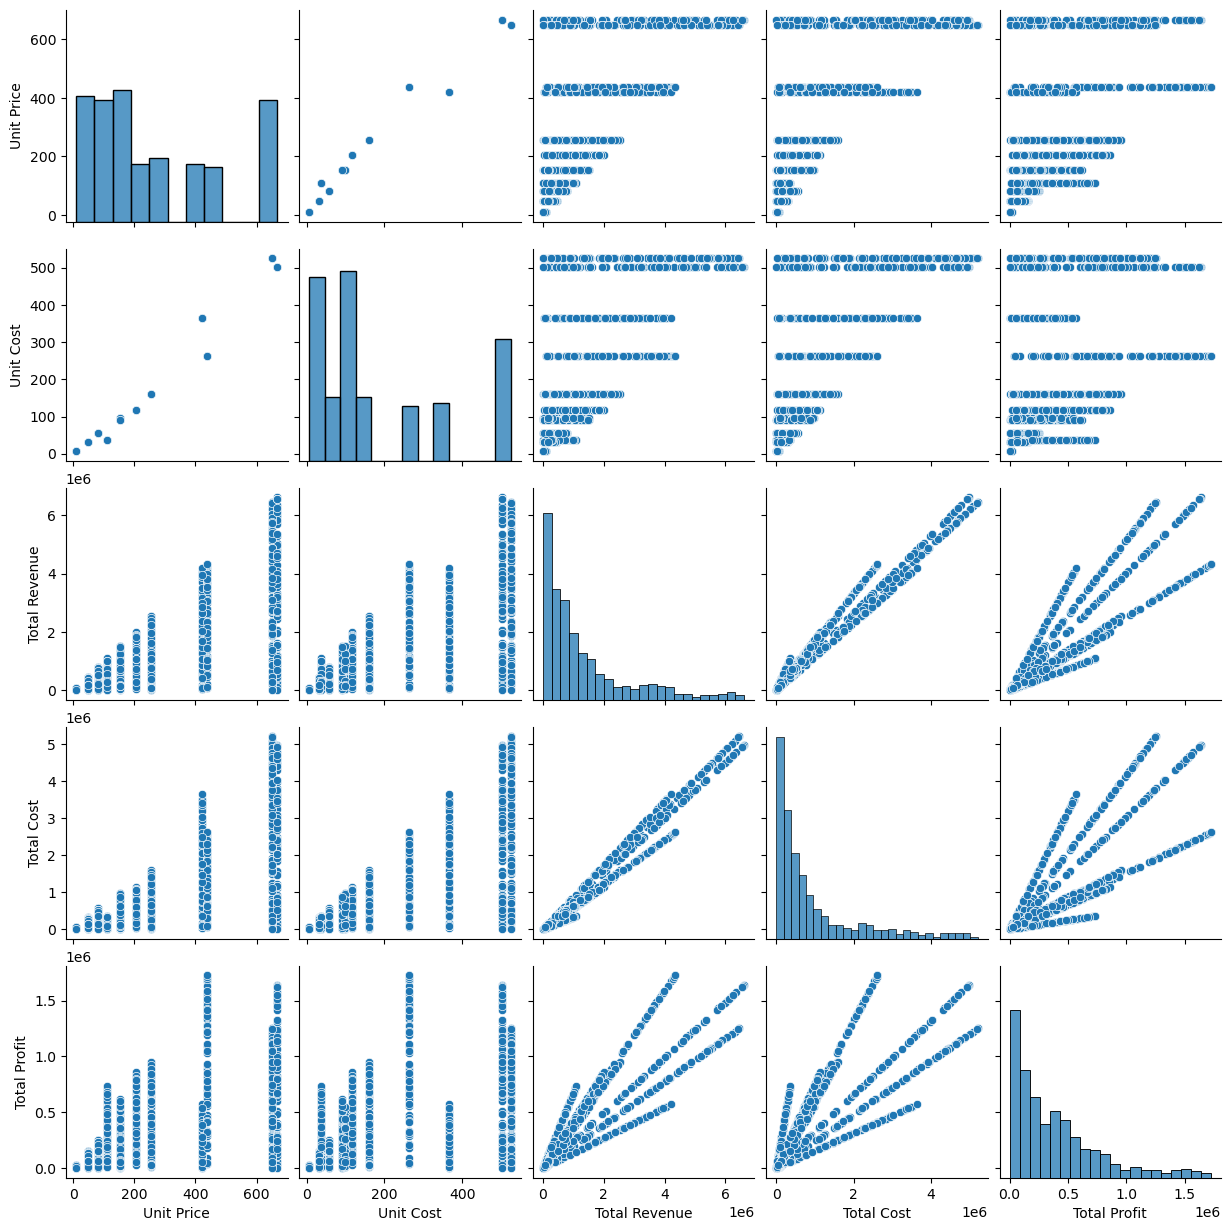

In [23]:
# visualize scatter plot to understand better relationship of data
sns.pairplot(df[['Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']])
plt.show()

From above scatter plot, we can see that for Total Revenue, Total Cost, Total Profit positively correlated i.e. they depend on each other.

In [24]:
# correlation with heatmap to interpret relation and multicolinearity
s=df.select_dtypes(include="number").corr()

<Axes: >

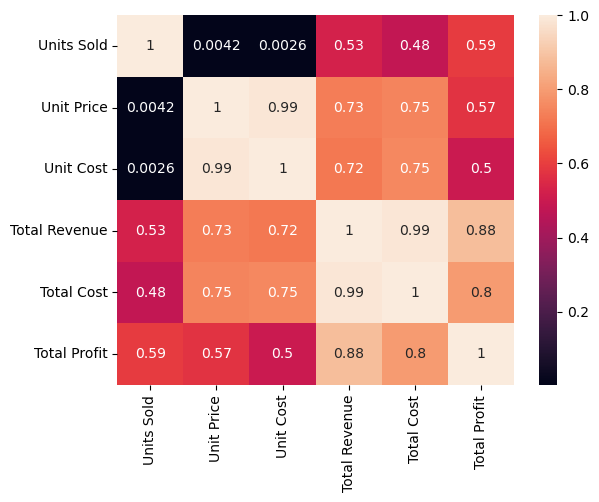

In [25]:
sns.heatmap(s,annot=True)

There is no missing values, garbage values, duplicate values in data, so for further operation we did not process with filling missing values, removing garbage values and duplicates from data.

## 4. Derive New Features

### (i). Profit Margin (%)

Total Profit Margin = (Total Profit / TotalRevenue) * 100

In [26]:
df['Profit_Margin_%'] = (df['Total Profit'] / df['Total Revenue']) * 100

### (ii). Order Processing Time:

Difference between Ship Date and Order Date.

In [27]:
df['Order_Processing_Time'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days

### (iii). Sales Channel Analysis

In [28]:
# Create dummy variables for the Sales Channel column
df = pd.get_dummies(df, columns=['Sales Channel'], drop_first=True)

### (iv). Region-Country Sales Contribution

Group by Region and Country to calculate total revenue and profit.

In [29]:
region_sales = df.groupby(['Region', 'Country'])[['Total Revenue', 'Total Profit']].sum().reset_index()

In [30]:
max(region_sales['Country'])

'Zimbabwe'

In [31]:
min(region_sales['Country'])

'Afghanistan'

### (v). Date-Time Features

In [43]:
df['Order_Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Order_Month'] = pd.to_datetime(df['Order Date']).dt.month

In [44]:
df.head()

Region Country   Item Type Order Priority Order Date  \
0  Middle East and North Africa   Libya   Cosmetics              M 2014-10-18   
1                 North America  Canada  Vegetables              M 2011-11-07   
2  Middle East and North Africa   Libya   Baby Food              C 2016-10-31   
3                          Asia   Japan      Cereal              C 2010-04-10   
4            Sub-Saharan Africa    Chad      Fruits              H 2011-08-16   

   Ship Date  Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  \
0 2014-10-31        8446      437.20     263.33     3692591.20  2224085.18   
1 2011-12-08        3018      154.06      90.93      464953.08   274426.74   
2 2016-12-09        1517      255.28     159.42      387259.76   241840.14   
3 2010-05-12        3322      205.70     117.11      683335.40   389039.42   
4 2011-08-31        9845        9.33       6.92       91853.85    68127.40   

   Total Profit  Profit_Margin_%  Order_Processing_Time  Sales Channel_Online  \
0    1468506.02        39.768984                     13                     0   
1     190526.34        40.977541                     31                     1   
2     145419.62        37.550924                     39                     0   
3     294295.98        43.067574                     32                     0   
4      23726.45        25.830654                     15                     0   

   Order_Year  Order_Month Order_Weekday  
0        2014           10      Saturday  
1        2011           11        Monday  
2        2016           10        Monday  
3        2010            4      Saturday  
4        2011            8       Tuesday

## 5. Data Visualization

### (a). Sales Distribution by Region

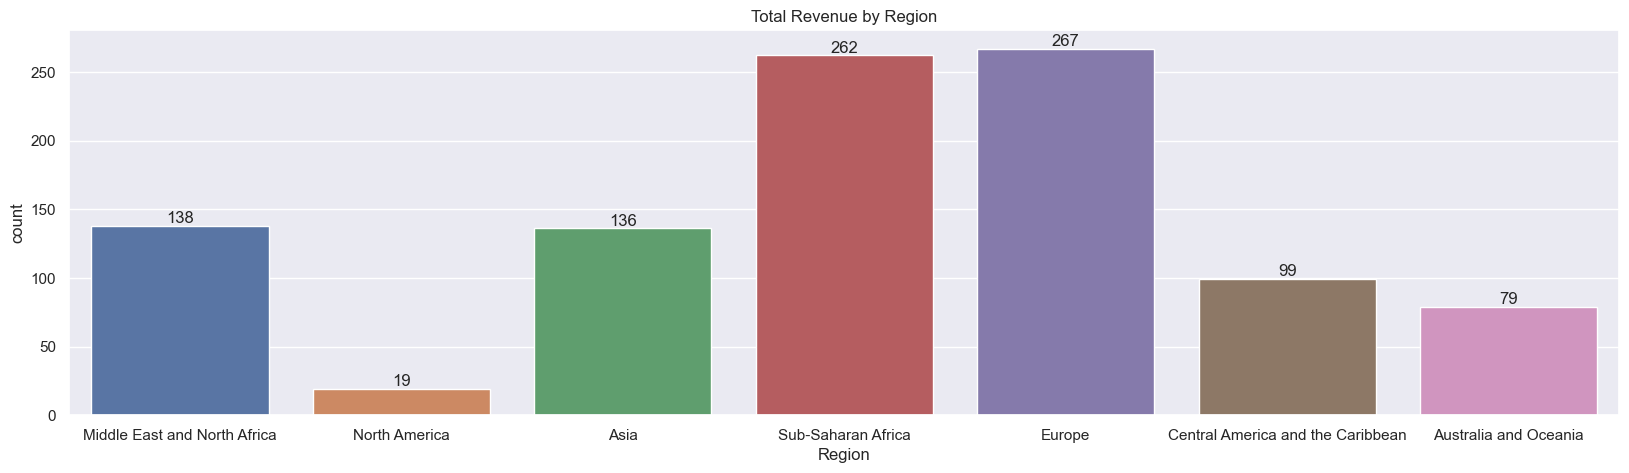

In [34]:
# plot barchart for distribution by region
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df,x='Region')
plt.title('Total Revenue by Region')

for bars in ax.containers:
    ax.bar_label(bars)

In [35]:
# plot funnel chart to compare the profit by region
region_sale = df.groupby(['Region'])[['Total Revenue', 'Total Profit']].sum().sort_values('Total Profit', ascending=False).reset_index()
region_sale
import plotly.express as px
fig = px.funnel(region_sale, x='Total Profit', y='Region')
fig.update_layout(title={"text": "Total Profit by Region"})

fig.show()

*From above graph, we can compare profit value by region and conclude that high-revenue and profit regions are Europe and Sub-Saharan Africa. The lowest revenue region is North America.*

### (b). Order processing Time Analysis

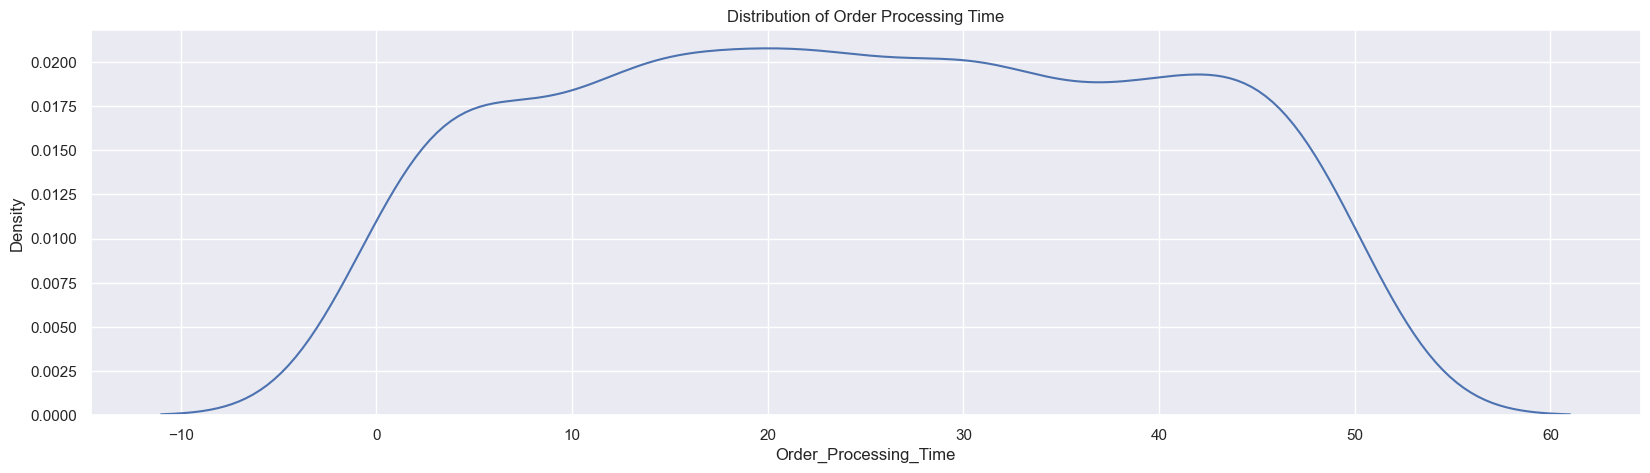

In [36]:
# plot kernel density function plot to show order delay time
sns.kdeplot(df['Order_Processing_Time'])
plt.title('Distribution of Order Processing Time')
plt.show()

*From above density grapgh shows that, mostly order processing takes usually 10-40 days.*

### (c). Profit Margin Distribution by Region

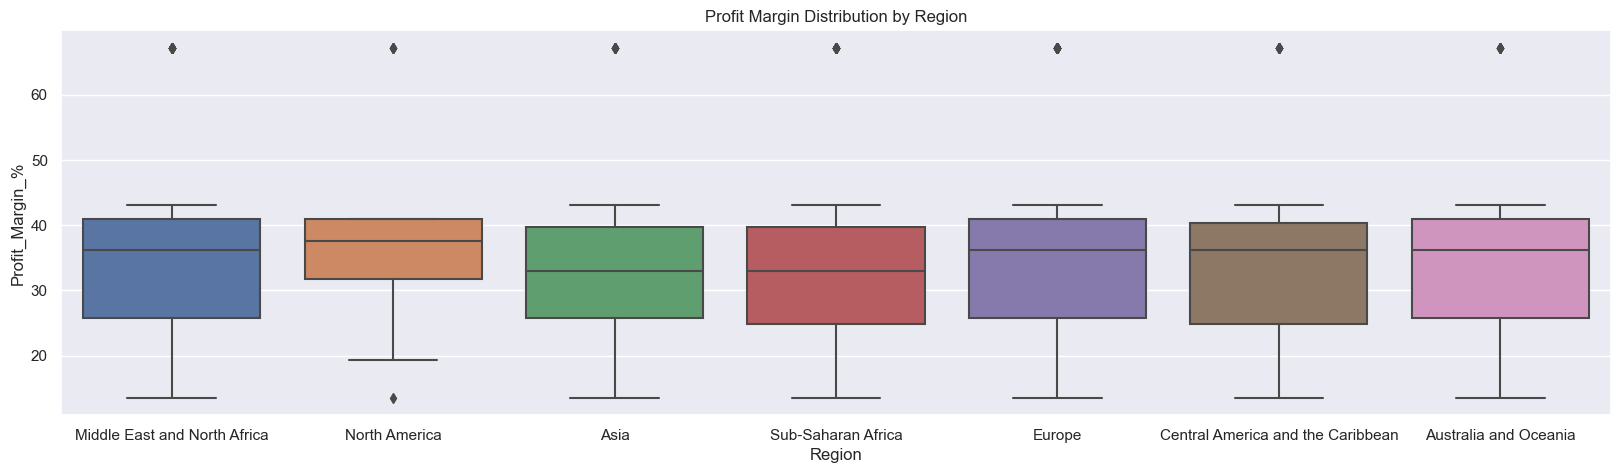

In [37]:
# plot boxplot to show profit margin by region
sns.boxplot(x='Region', y='Profit_Margin_%', data=df)
sns.set(rc={'figure.figsize':(20,5)})

plt.title('Profit Margin Distribution by Region')

for bars in ax.containers:
    ax.bar_label(bars)

*Top 3 Profit-Margin Regions are Europe, Sub-Saharan Africa whereas lowest Profit-Margin Region is North America.*

### (d). Total Revenue by Product Type

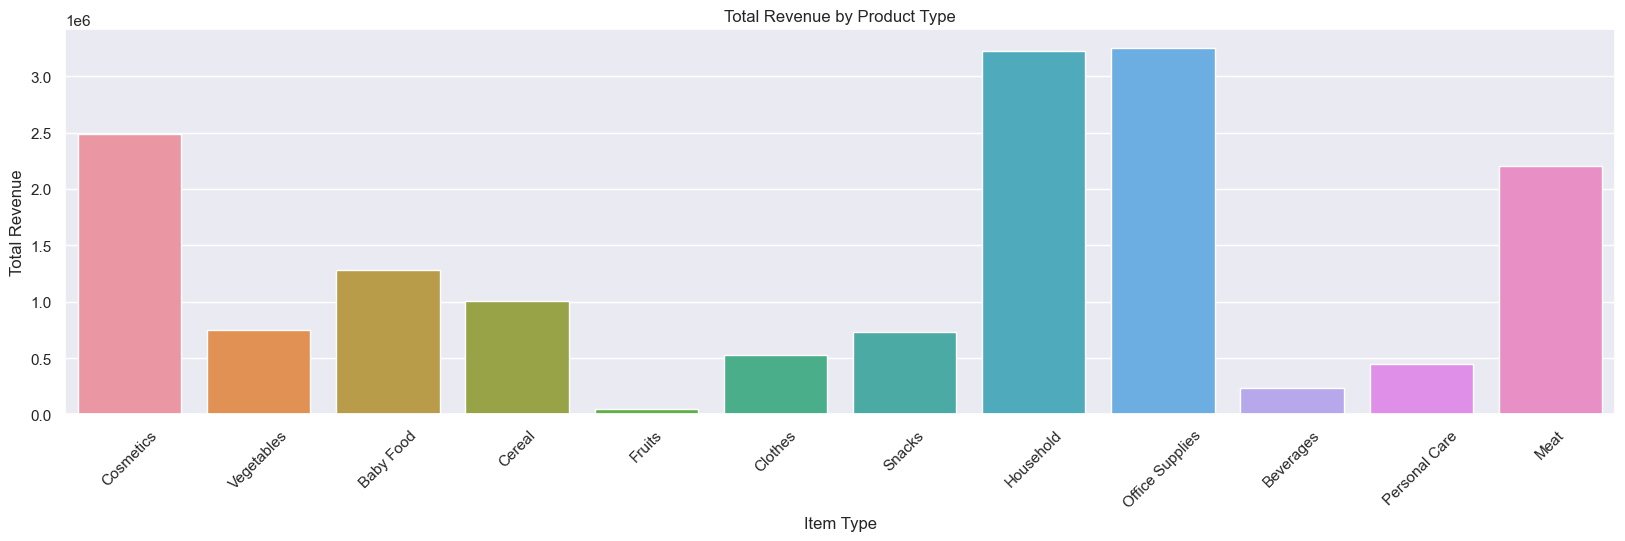

In [38]:
# plot bar chart for revenue by product
sns.barplot(x='Item Type', y='Total Revenue', data=df, ci=None)
plt.xticks(rotation=45)
plt.title('Total Revenue by Product Type')
plt.show()

*Highest Revenue gained from Products are Household, Office Supplies item, Cosmetics.*

### (e). Total Profit by Product Type

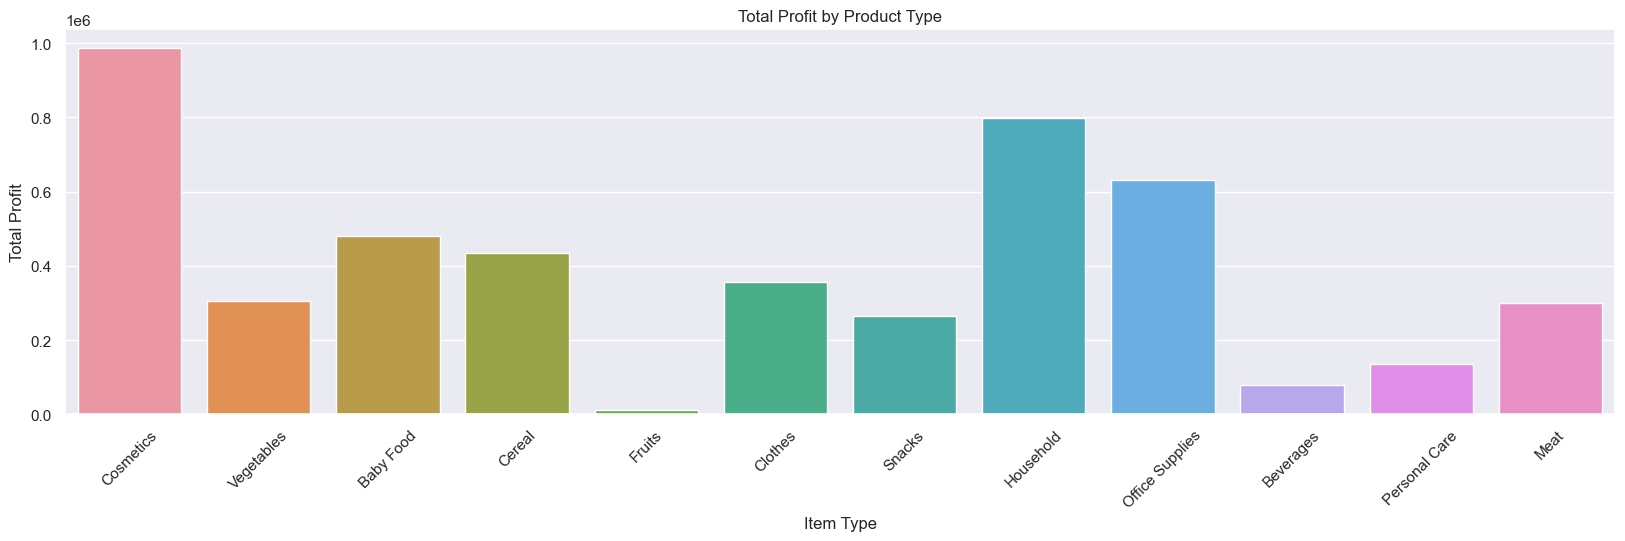

In [39]:
# plot bar chart for profit by product
sns.barplot(x='Item Type', y='Total Profit', data=df, ci=None)
plt.xticks(rotation=45)
plt.title('Total Profit by Product Type')
plt.show()

*Highest Revenue followed by Cosmetics, Household, Office Supplies.*

### (f). Monthly and Yearly Sales Trend

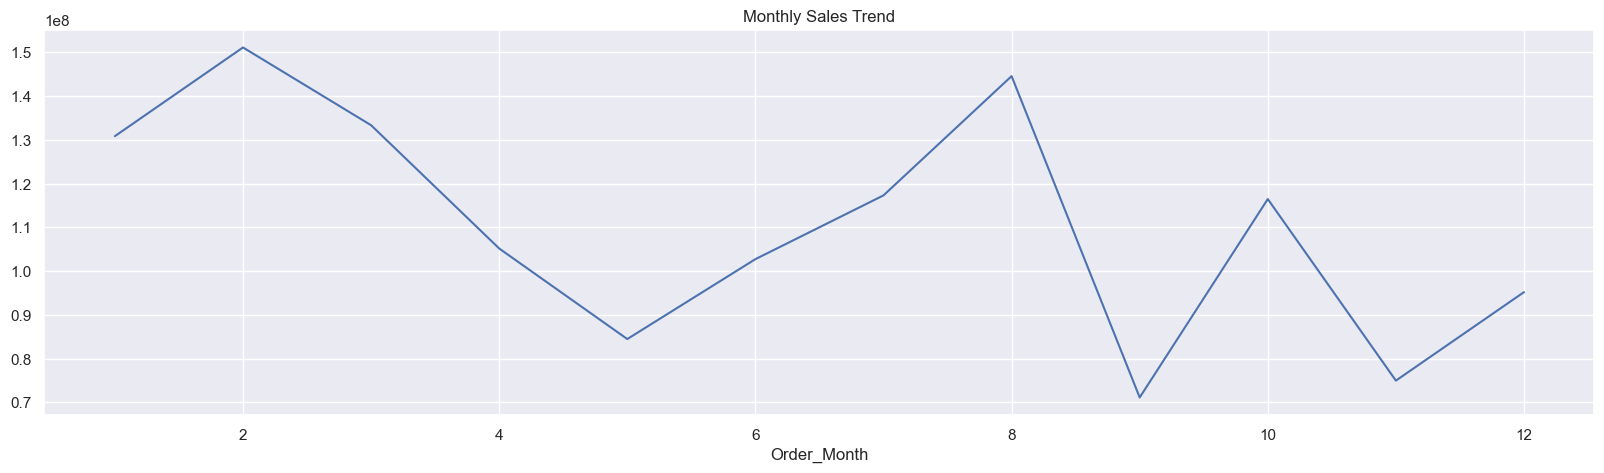

In [40]:
# plot line chart for monthly sales trend
monthly_sales = df.groupby('Order_Month')['Total Revenue'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.show()

*Sales at peak in months followed by February, August, October. September, November month has low sales.*

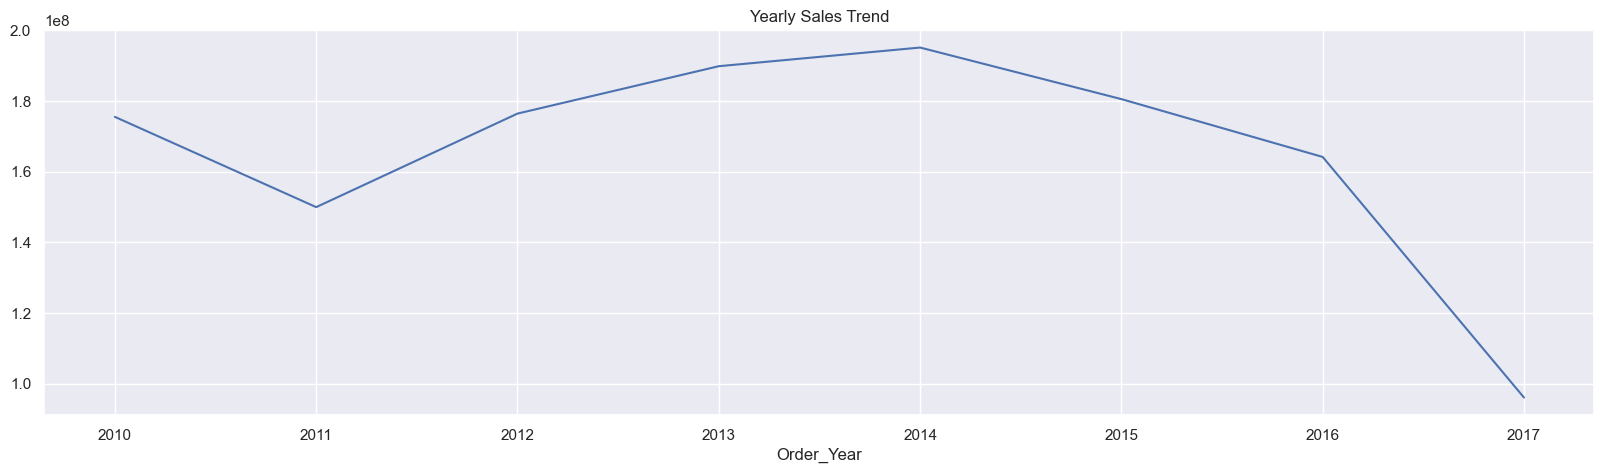

In [41]:
# plot line chart for yearly sales trend
yearly_sales = df.groupby('Order_Year')['Total Revenue'].sum()
yearly_sales.plot(kind='line')
plt.title('Yearly Sales Trend')
plt.show()

*In year 2017, 2011, 2016 sales were low whereas in 2014 sales was high.*

### (g). Profit Contribution by Sales Channel

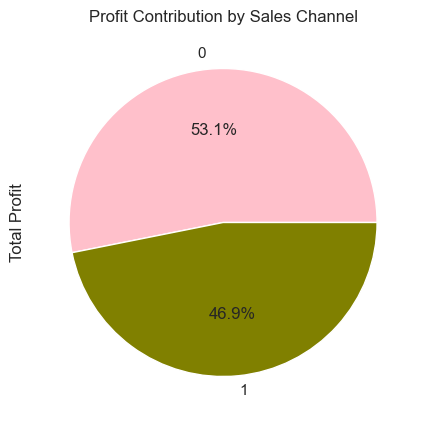

In [42]:
# plot piechart to categories sales channel by profit
df.groupby('Sales Channel_Online')['Total Profit'].sum().plot(kind='pie', autopct='%1.1f%%', colors=["pink","olive"])
plt.title('Profit Contribution by Sales Channel')
plt.show()

*In sales channel, offilne mode contribute more Profit.*

## 6. Report

*Europe and Sub-Saharan Africa generated high Revenue and Profit in Cosmetics, Household, Office supplies via Offline mode in year 2014.*